In [64]:
import pandas as pd
from transformers import pipeline
import torch
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
qbs_and_clusters = pd.read_pickle("https://github.com/jake-lukasik/NFL-Player-Clustering/raw/refs/heads/main/filtered-data/QBS-and-Comments.pkl")
qbs_and_clusters.head()

,Player,Team,Cluster,reddit_comments
0,Joe Burrow,CIN,2,[Joe Burrow bought those so they could attack ...
1,Jared Goff,DET,2,"[Jared Goff is elite at play action, Jared Gof..."
2,Baker Mayfield,TAM,2,"[If you don't like Baker Mayfield, fuck you., ..."
3,Geno Smith,SEA,0,"[GENO SMITH BENDS THE KNEE!!!, Geno Smith and ..."
4,Sam Darnold,MIN,2,[Surely Sam Darnold succeeding Geno Smith will...


In [58]:
# load sentiment pipeline https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english 
sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

Device set to use cpu


In [59]:
# define labels for sentiment
def label_to_score(label):
    return 1 if label == "POSITIVE" else -1

# compute average sentiment from comments
def get_avg_sentiment(comments):
    results = sentiment_pipeline(comments, truncation=True)
    scores = [label_to_score(r["label"]) for r in results]
    return sum(scores) / len(scores)

In [60]:
qbs_and_clusters["avg_sentiment"] = qbs_and_clusters["reddit_comments"].apply(get_avg_sentiment)

In [61]:
qbs_and_clusters = qbs_and_clusters.sort_values(by="avg_sentiment", ascending=False)

In [63]:
cluster_summary = qbs_and_clusters.groupby("Cluster")["avg_sentiment"].mean()
print(cluster_summary)

Cluster
0   -0.193333
1   -0.115844
2    0.106667
3   -0.120000
Name: avg_sentiment, dtype: float64


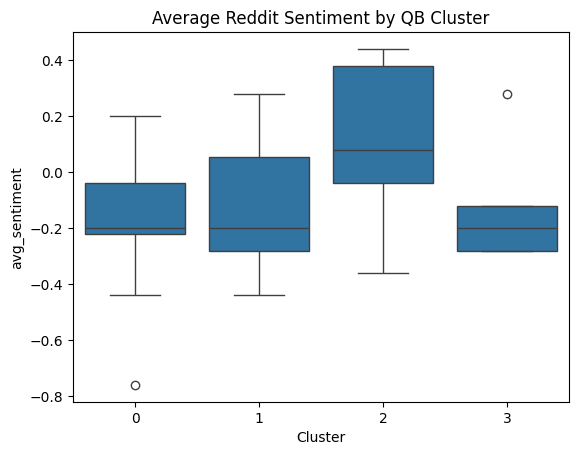

In [65]:
sns.boxplot(x="Cluster", y="avg_sentiment", data=qbs_and_clusters)
plt.title("Average Reddit Sentiment by QB Cluster")
plt.show()

C:\Users\jakel\AppData\Local\Temp\ipykernel_3196\1129826556.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha="right")


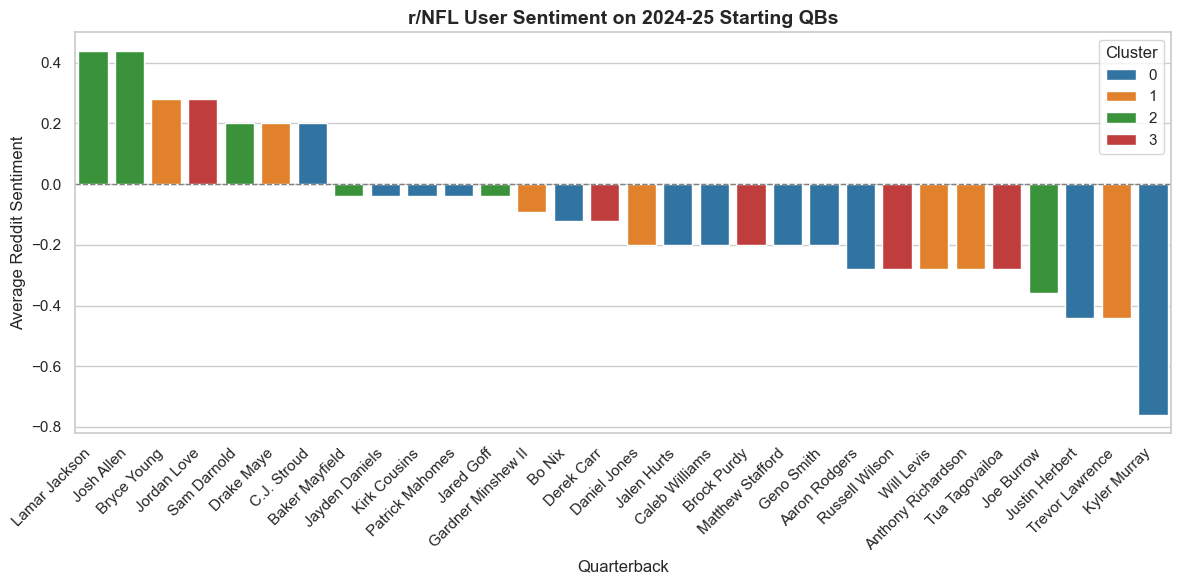

In [72]:
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# init barplot obj w/ all of necessary parms
barplot = sns.barplot(
    x="Player",
    y="avg_sentiment",
    hue="Cluster",
    data=qbs_and_clusters,
    dodge=False,  
    palette="tab10" 
)

# rotate the x-axis labels so you can actually read them
barplot.set_xticklabels(barplot.get_xticklabels(), rotation=45, ha="right")

# labels and title
plt.xlabel("Quarterback", fontsize=12)
plt.ylabel("Average Reddit Sentiment", fontsize=12)
plt.title("r/NFL User Sentiment on 2024-25 Starting QBs", fontsize=14, weight="bold")

# ref line at h=0
plt.axhline(0, color="gray", linewidth=1, linestyle="--")

# make it a little prettier
plt.tight_layout()
plt.legend(title="Cluster")
plt.show()
